In [1]:
import cv2
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import pandas as pd
import csv


# Import matplotlib libraries
# from matplotlib import pyplot as plt
# from matplotlib.collections import LineCollection
# import matplotlib.patches as patches

# import imageio
# from IPython.display import HTML, display


In [2]:
def img_crop (image):
  height=image.shape[0]
  width=image.shape[1]
  h_lower=int(height/2+ (0.45*height))
  h_upper=int(height/2- (0.38*height))
  w_left=int(width/2-(0.3*width))
  w_right=int(width/2+(0.2*width))
  #print(h_upper)
  image = image[h_upper:h_lower, w_left:w_right, :]

  return image

In [3]:
import os
import numpy as np
import cv2
from glob import glob

def create_dir(path):
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError:
        print(f"ERROR: creating directory with name {path}")
def save_frame(video_path, save_dir, gap=30):
    name = video_path.split("/")[-1].split(".")[0].lower()
    subname=name[6:]
    
  
  
    print(name)
    print(subname)
    if (name.find("_bhu") != -1) :
          save_path = os.path.join(save_dir, "Bhujangasana",subname)  
    elif (name.find("_padam") != -1) or (name.find("_padma") != -1):
          save_path = os.path.join(save_dir, "Padamasana",subname)
    elif (name.find("_shav") != -1):
          save_path = os.path.join(save_dir, "Shavasana",subname)
    elif (name.find("_trik") != -1):
          save_path = os.path.join(save_dir, "Trikonasana",subname)
    elif (name.find("_vriksh") != -1):
          save_path = os.path.join(save_dir, "Vrikshasana",subname)
    elif (name.find("_tad") != -1):
        save_path = os.path.join(save_dir, "Tadasana",subname)
    else:
        print(subname)
    print(save_path)
    
    create_dir(save_path)

    cap = cv2.VideoCapture(video_path)
    #fps = cap.get( cv2.CAP_PROP_FPS ) 
    #print(fps)
    idx = 0

    while True:
        ret, frame = cap.read()

        if ret == False:
            cap.release()
            break

        if (idx>=15 and (idx-gap//2) % gap == 0):
            image=img_crop(frame)
            cv2.imwrite(f"{save_path}/{idx}.png", image)

        idx += 1
if __name__ == "__main__":
    video_paths = glob("Yoga_Vid_Collected/train/*")
    save_dir = "dataset/train"
    

    for path in video_paths:
        save_frame(path, save_dir, gap=30)
    
    video_paths = glob("Yoga_Vid_Collected/test/*")
    save_dir = "dataset/test"
    
    for path in video_paths:
        save_frame(path, save_dir, gap=30)

train\abhay_bhuj
abhay_bhuj
dataset/train\Bhujangasana\abhay_bhuj
train\abhay_padam
abhay_padam
dataset/train\Padamasana\abhay_padam
train\abhay_shav
abhay_shav
dataset/train\Shavasana\abhay_shav
train\abhay_tada
abhay_tada
dataset/train\Tadasana\abhay_tada
train\abhay_trik
abhay_trik
dataset/train\Trikonasana\abhay_trik
train\abhay_vriksh
abhay_vriksh
dataset/train\Vrikshasana\abhay_vriksh
train\ameya_bhuj
ameya_bhuj
dataset/train\Bhujangasana\ameya_bhuj
train\ameya_padam
ameya_padam
dataset/train\Padamasana\ameya_padam
train\ameya_shav
ameya_shav
dataset/train\Shavasana\ameya_shav
train\ameya_tadasan
ameya_tadasan
dataset/train\Tadasana\ameya_tadasan
train\ameya_trikonasana
ameya_trikonasana
dataset/train\Trikonasana\ameya_trikonasana
train\ameya_vriksh
ameya_vriksh
dataset/train\Vrikshasana\ameya_vriksh
train\bhumi_bhuj
bhumi_bhuj
dataset/train\Bhujangasana\bhumi_bhuj
train\bhumi_padam
bhumi_padam
dataset/train\Padamasana\bhumi_padam
train\bhumi_shav
bhumi_shav
dataset/train\Shavasa

In [ ]:
def keypts_abs(keypoints):
  kpts_x = keypoints[0, 0, :, 0]
  kpts_y = keypoints[0, 0, :, 1]
  kpts_scores = keypoints[0, 0, :, 2]

  print(kpts_x.shape)
  kpts_absolute_xy = np.stack(
      [width * np.array(kpts_x), height * np.array(kpts_y)], axis=-1)

  kpts_absolute_xy.shape

  keypoint_threshold=0.2
  kpts_above_thresh_absolute = kpts_absolute_xy[
      kpts_scores > keypoint_threshold, :]
  return kpts_above_thresh_absolute

In [13]:
data=[]
KEYPOINT_DICT = [
    'nose',
    'left_eye',
    'right_eye',
    'left_ear',
    'right_ear',
    'left_shoulder',
    'right_shoulder',
    'left_elbow',
    'right_elbow',
    'left_wrist',
    'right_wrist',
    'left_hip',
    'right_hip',
    'left_knee',
    'right_knee',
    'left_ankle',
    'right_ankle'
]
for p in KEYPOINT_DICT:
        data.append(p + "_x")
        data.append(p + "_y")
#         data.append(p + "_vis")
data.append( "label")
with open('testfile.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(data)
# Load the input image.
  
def image_to_movenet(path,keypts_labels):
    
    if (path.find("Bhujangasana") != -1) :
          label="Bhujangasana"  
    elif (path.find("Padamasana") != -1):
          label="Padamasana"
    elif (path.find("Shavasana") != -1):
          label="Shavasana"
    elif (path.find("Trikonasana") != -1):
          label="Trikonasana"
    elif (path.find("Vrikshasana") != -1):
          label="Vrikshasana"
    elif (path.find("Tadasana") != -1):
          label="Tadasana"
        
    image_path = path
    image = tf.io.read_file(image_path)
    image = tf.compat.v1.image.decode_jpeg(image)
    image = tf.expand_dims(image, axis=0)
    # Resize and pad the image to keep the aspect ratio and fit the expected size.
    image = tf.cast(tf.image.resize_with_pad(image, 256, 256), dtype=tf.int32)

    # Download the model from TF Hub.
    model = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
    movenet = model.signatures['serving_default']

    # Run model inference.
    outputs = movenet(image)
    # Output is a [1, 1, 17, 3] tensor.
    keypoints = outputs['output_0']
    kpts_x = keypoints[0, 0, :, 0]
    kpts_y = keypoints[0, 0, :, 1]
    kpts_scores = keypoints[0, 0, :, 2]
    
    keypoints_tup=(keypoints,label)
    keypts_labels.append(keypoints_tup)
#     print(keypoints)
    
    

     # Empty dataset
    t_x=kpts_x.numpy()
    t_y=kpts_y.numpy()
    
    tn=[]
#     tn=['nose_x', 'nose_y', 'nose_vis', 'left_eye_x', 'left_eye_y', 'left_eye_vis', 'right_eye_x', 'right_eye_y', 'right_eye_vis', 'left_ear_x', 'left_ear_y', 'left_ear_vis', 'right_ear_x', 'right_ear_y', 'right_ear_vis', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_vis', 'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_vis', 'left_elbow_x', 'left_elbow_y', 'left_elbow_vis', 'right_elbow_x', 'right_elbow_y', 'right_elbow_vis', 'left_wrist_x', 'left_wrist_y', 'left_wrist_vis', 'right_wrist_x', 'right_wrist_y', 'right_wrist_vis', 'left_hip_x', 'left_hip_y', 'left_hip_vis', 'right_hip_x', 'right_hip_y', 'right_hip_vis', 'left_knee_x', 'left_knee_y', 'left_knee_vis', 'right_knee_x', 'right_knee_y', 'right_knee_vis', 'left_ankle_x', 'left_ankle_y', 'left_ankle_vis', 'right_ankle_x', 'right_ankle_y', 'right_ankle_vis', 'label']
   
    for i in range(0,17):
        tn.append(t_x[i])
        tn.append(t_y[i])
    tn.append(label)
#      #convert to Numpy array

    
    with open('testfile.csv','a') as out:
        csv_out=csv.writer(out)
        csv_out.writerow(tn)


In [9]:
import os
import time

path_lst=[]
keypts_labels_train=[]
keypts_labels_test=[]


class_list=os.listdir('dataset/train')
for name in class_list:
    for image in os.listdir(f"dataset/train/{name}"):
        for item in os.listdir(f"dataset/train/{name}/{image}"):
             path_lst.append(os.path.abspath(f"dataset/train/{name}/{image}/{item}"))



path_lst = sorted(path_lst,key=os.path.getmtime)
for path in path_lst:
#     print(path)
    image_to_movenet(path,keypts_labels_train)

# class_list=os.listdir('dataset/test')
# for name in class_list:
#     for image in os.listdir(f"dataset/test/{name}"):
#         for item in os.listdir(f"dataset/test/{name}/{image}"):
#              path_lst.append(os.path.abspath(f"dataset/test/{name}/{image}/{item}"))



# path_lst = sorted(path_lst,key=os.path.getmtime)
# for path in path_lst:
#     image_to_movenet(path,keypts_labels_test)    


['D:\\BE\\Project\\Yoga_Class-Analysis\\dataset\\train\\Bhujangasana\\abhay_bhuj\\15.png', 'D:\\BE\\Project\\Yoga_Class-Analysis\\dataset\\train\\Bhujangasana\\abhay_bhuj\\45.png', 'D:\\BE\\Project\\Yoga_Class-Analysis\\dataset\\train\\Bhujangasana\\abhay_bhuj\\75.png', 'D:\\BE\\Project\\Yoga_Class-Analysis\\dataset\\train\\Bhujangasana\\abhay_bhuj\\105.png', 'D:\\BE\\Project\\Yoga_Class-Analysis\\dataset\\train\\Bhujangasana\\abhay_bhuj\\135.png', 'D:\\BE\\Project\\Yoga_Class-Analysis\\dataset\\train\\Bhujangasana\\abhay_bhuj\\165.png', 'D:\\BE\\Project\\Yoga_Class-Analysis\\dataset\\train\\Bhujangasana\\abhay_bhuj\\195.png', 'D:\\BE\\Project\\Yoga_Class-Analysis\\dataset\\train\\Bhujangasana\\abhay_bhuj\\225.png', 'D:\\BE\\Project\\Yoga_Class-Analysis\\dataset\\train\\Bhujangasana\\abhay_bhuj\\255.png', 'D:\\BE\\Project\\Yoga_Class-Analysis\\dataset\\train\\Bhujangasana\\abhay_bhuj\\285.png', 'D:\\BE\\Project\\Yoga_Class-Analysis\\dataset\\train\\Bhujangasana\\abhay_bhuj\\315.png', '

In [3]:
# Change the csv to have nose, left_eye, right_eye,... as its columns which match the output of movenet
# nose: (x,y)

keypts_data=pd.read_csv("testfile.csv")
keypts_data.head()

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,label
0,0.786219,0.870219,0.780104,0.877386,0.779377,0.875384,0.754742,0.863472,0.755459,0.860472,...,0.575943,0.743863,0.439178,0.771758,0.430989,0.720005,0.330208,0.747289,0.303114,Bhujangasana
1,0.775227,0.879122,0.761516,0.882190,0.763890,0.880481,0.745867,0.858489,0.751119,0.857317,...,0.571094,0.743376,0.442854,0.771083,0.433099,0.723416,0.329023,0.749673,0.302236,Bhujangasana
2,0.657915,0.861576,0.640377,0.859831,0.642340,0.858728,0.644250,0.828227,0.648826,0.823555,...,0.579051,0.730606,0.447167,0.764983,0.438530,0.711451,0.338479,0.745072,0.302249,Bhujangasana
3,0.541323,0.774551,0.528623,0.769445,0.531242,0.766369,0.534882,0.735442,0.542299,0.732100,...,0.586507,0.744453,0.442331,0.766523,0.440847,0.727988,0.321242,0.755181,0.283036,Bhujangasana
4,0.521145,0.742420,0.508642,0.734031,0.511578,0.732600,0.516776,0.698156,0.525997,0.697749,...,0.573039,0.743826,0.434950,0.767857,0.437005,0.738430,0.309989,0.756184,0.287195,Bhujangasana


# Shreyas

In [114]:
import matplotlib.pyplot as plt

In [115]:
x_train = []
train_sample = []

x_train.append(keypts_data.iloc[0:18].drop('label', axis=1).values)
x_train.append(keypts_data.iloc[18:47].drop('label', axis=1).values)

x_train[1].shape

# x_train = np.array(x_train)
# y_train = np.array([0])

# print(x_train.shape, y_train.shape)

# x_train = np.expand_dims(x_train, 0)
# print(x_train.shape, y_train.shape)

(29, 34)

In [116]:
training_array = []
for arr in x_train:
    sample = np.zeros((30, 34))
    sample[:arr.shape[0], :arr.shape[1]] = arr
    training_array.append(sample)
    
train = np.array(training_array)
label = np.array([0, 1])

In [128]:
x_train = train
y_train = label

print(x_train.shape, y_train.shape)

(2, 30, 34) (2,)


In [129]:
model = tf.keras.Sequential()
# output embedding dimension of size 64.
model.add(tf.keras.layers.Input(shape=(30,34)))

# Add a LSTM layer with 128 internal units.
model.add(tf.keras.layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(tf.keras.layers.Dense(2))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 128)               83456     
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 258       
Total params: 83,714
Trainable params: 83,714
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

In [125]:
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.7385 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 28ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 0.6624 - accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 16ms/step - loss: 0.6339 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 16ms/step - loss: 0.6102 - accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 16ms/step - loss: 0.5903 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 16ms/step - loss: 0.5734 - accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 16ms/step - loss: 0.5589 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 16ms/step - loss: 0.5461 - accuracy: 0.5000
Epoch 10/50
1/1 [==============================] - 0s 16ms/step - loss: 0.5347 - accuracy: 0.5000
Epoch 11/50
1/1 [==========

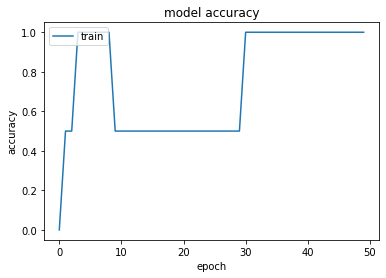

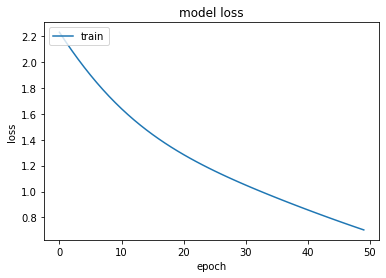

In [122]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Shreyas __end__

In [15]:
keypts_data=pd.read_csv("testfile.csv")
keypts_data.head()

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,label
0,0.786219,0.870219,0.780104,0.877386,0.779377,0.875384,0.754742,0.863472,0.755459,0.860472,...,0.575943,0.743863,0.439178,0.771758,0.430989,0.720005,0.330208,0.747289,0.303114,Bhujangasana
1,0.775227,0.879122,0.761516,0.882190,0.763890,0.880481,0.745867,0.858489,0.751119,0.857317,...,0.571094,0.743376,0.442854,0.771083,0.433099,0.723416,0.329023,0.749673,0.302236,Bhujangasana
2,0.657915,0.861576,0.640377,0.859831,0.642340,0.858728,0.644250,0.828227,0.648826,0.823555,...,0.579051,0.730606,0.447167,0.764983,0.438530,0.711451,0.338479,0.745072,0.302249,Bhujangasana
3,0.541323,0.774551,0.528623,0.769445,0.531242,0.766369,0.534882,0.735442,0.542299,0.732100,...,0.586507,0.744453,0.442331,0.766523,0.440847,0.727988,0.321242,0.755181,0.283036,Bhujangasana
4,0.521145,0.742420,0.508642,0.734031,0.511578,0.732600,0.516776,0.698156,0.525997,0.697749,...,0.573039,0.743826,0.434950,0.767857,0.437005,0.738430,0.309989,0.756184,0.287195,Bhujangasana


In [16]:
len(keypts_data)

1689

In [17]:
fields = ['Sample', 'Label'] 

with open('new_train.csv', 'a') as csvfile:
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    

outer_list=[]
inner_list=[]
for i in range(0,len(keypts_data)-1):
    if(keypts_data['label'][i]==keypts_data['label'][i+1]):
        inner_list.append(keypts_data.iloc[i].drop('label').values)
    else:
        inner_list.append(keypts_data.iloc[i].drop('label').values)
        outer_list.append(np.array(inner_list))
        outer_list.append(keypts_data['label'][i])
        with open('new_train.csv', 'a') as csvfile:
            csvwriter = csv.writer(csvfile) 
            csvwriter.writerow(outer_list)
        inner_list=[]
        outer_list=[]
        
        
